# Example Runge Kutta

The general form of the population growth differential equation
$$ y^{'}=t-y, \ \ (0 \leq t \leq 4) $$
with the initial condition
$$y(0)=1,$$
Has the exact soulation. $$ y= 2e^{-t}+t-1$$



#### Setting up Libraries

In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


## Defining the function
$$f(t,y)=t-y$$ 

In [2]:
def myfun_ty(t,y):
    return y*t-2*t*t

## Initial Setup
Defining the step size $h$ from the interval range $a\leq t \leq b$ and number of steps $N$
$$h=\frac{b-a}{h}.$$
This gives the discrete time steps,
$$t_{i}=t_0+ih,$$
where $t_0=a$.

In [3]:
# Start and end of interval
b=2
a=1
# Step size
N=4
h=(b-a)/(N)
t=np.arange(a,b+h,h)

## Setting up the initial conditions of the equation
$$w_0=IC$$


In [4]:
# Initial Condition
IC=2
w=np.zeros(N+1)
k1=np.zeros(N+1)
k2=np.zeros(N+1)
y=(IC+1)*np.exp(-t)+t-1#np.zeros(N+1)
w[0]=IC

## 2nd Order Runge Kutta (Mid-method)
$$k_1=f(t,y),$$
$$k_2=f(t+\frac{h}{2},y+\frac{h}{2}k_2),$$
$$w_{i+1}=w_{i}+h(k_2).$$

In [5]:
for k in range (0,N):
    k1[k]=myfun_ty(t[k],w[k])
    k2[k]=myfun_ty(t[k]+h/2,w[k]+h/2*k1[k])
    w[k+1]=w[k]+h*(k2[k])

## Plotting Results

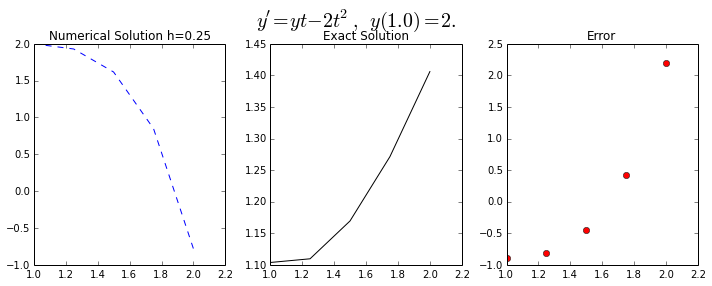

In [6]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='blue')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,y,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,y-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$y'=yt-2t^2,   \ \ y(%s)=%s.$"%(t[0],IC), fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.85)    

In [7]:
print(k1)

[ 0.         -0.71289062 -2.07439041 -4.64037639  0.        ]


In [9]:
print(k2)
print(w)

[-0.28125    -1.25045776 -3.07486683 -6.52817006  0.        ]
[ 2.          1.9296875   1.61707306  0.84835635 -0.78368616]


In [10]:
print(h)

0.25
